In [7]:
import sys
sys.path.append('../functions')
import time
import numpy as np
import spg_etalon
import et_mueller2 as etm
import transmission_fdt as fdt

from matplotlib import pyplot as plt

def tol(x,y,tolerance=1e-9):
    check = np.isclose(x,y, rtol= tolerance)
    if not check.all():
        print('NO MATCH')
    else:
        print('Similar')


In [8]:
a=spg_etalon.EtalonProp()
a.show()


-----------------Etalon main parameters------------------
(wvl0) Central wavelength [m]:            +6.173e-7
(fnum) f number:                          63.5
(no) Ord. refraciton index:               2.29
(ne) Ext. refraciton index:               2.29
(h) Etalon thickness [m]:                 +2.500207171521161e-4
(r) Reflectivity:                         0.92
(a) Absorptance:                          0
(wvl) Peak wavelength [m]:                +6.173018245588635e-7
(m) Order of the resonance peak:          1855
(d_h) Thickness var. to tune to wvl0 [m]: +2.0717152116101468e-8
(tau) Transmittance:                      1
(fin) Finesse:                            575.0000000000006
(theta3) etalon optical axis [degree]:    0
(rp) pupil radius [m]:                    0.00875
(f) focal [m]:                            1.11125
(tol) Tolerance:                          +1e-10
---------Integration and instrument parameters ----------
(intr) Rho int. values (from,to,step):    [0.0, 0.00875, 50.0]


In [15]:
#Spectral parameters
wvl0=etm.wvl0 #Central wavelength (617.3 nm)
delta_1=50e-12 #Lower boundary of the wavelength range
delta_2=50e-12 #Upper boundary of the wavelength range
Nl=121 #Number of wavelengths for the sampling of the profiles
wvlv=wvl0+np.linspace(-delta_1,delta_2,Nl) #Wavelengths vector

In [16]:
a.intr = [0,a.rp,10]
a.intt = [0,2.0*np.pi,10]

Changes integration indices in intr to [0.0, 0.00875, 10.0]
Changes integration indices in intt to [0.0, 6.283185307179586, 10.0]


In [19]:
#Call to transm_fdt
start = time.time()
atilde=fdt.transm_fdt(0.1,0,wvlv,0.1,0,0.23)
end = time.time()
print('python  time:',(end - start))

start = time.time()
ab = spg_etalon.integrate(a, wvlv,0.1, 0.0, 0.1,0.0,0.23)
end = time.time()
print('rust  time:',(end - start))

tol(atilde,ab)

Computation of integrals...
python  time: 0.3403198719024658
rust  time: 0.007161855697631836
NO MATCH


In [12]:
tumadre

NameError: name 'tumadre' is not defined

In [ ]:
cases = np.linspace(10,1000,20)
time1 = []
time2 = []
for i in cases:
    wvlv=wvl0+np.linspace(-delta_1,delta_2,int(i)) #Wavelengths vector

    start = time.time()
    atilde=fdt.transm_fdt(0.1,0,wvlv,0.0,0,0.23)
    end = time.time()
    time1.append(end-start)

    start = time.time()
    ab = spg_etalon.integrate(a, wvlv,0.1, 0.0, 0.0,0.0,0.23)
    end = time.time()
    time2.append(end-start)

Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integrals...
Computation of integ

(1.0, 50.0)

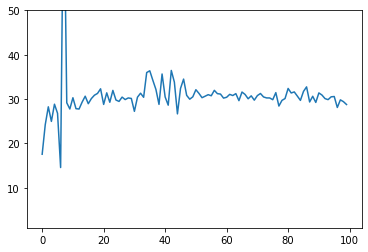

In [ ]:
plt.plot(np.array(time1)/np.array(time2))
plt.ylim(1.0,50.0)

In [ ]:
# Computation of integrals...
# python  time: 0.009274089336395263
# rust  time: 0.005178781350453695
# NO MATCH

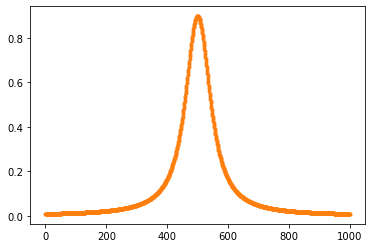

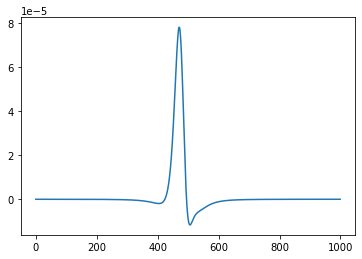

In [ ]:

plt.plot(atilde)
plt.plot(ab,'.')
plt.show()
plt.plot(atilde - np.array(ab))
plt.show()